# Gstm1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, mannwhitneyu

In [2]:
gene = 'Gstm1'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30514214,C57BL/6N,m,control,wt (Acnat2),29.4,85.84,53.84,3.06,1.40
1,30514216,C57BL/6N,m,control,wt (Acnat2),28.1,91.82,62.17,2.63,0.94
2,30514224,C57BL/6N,m,control,wt (Acnat2),27.5,93.47,64.96,2.44,0.84
3,30514237,C57BL/6N,f,control,wt (Acnat2),21.8,90.22,59.19,2.44,1.01
4,30514244,C57BL/6N,m,control,wt (Acnat2),26.5,92.14,62.33,2.50,1.00
5,30514249,C57BL/6N,f,control,wt (Acnat2),22.0,95.61,69.10,2.12,0.68
6,30514250,C57BL/6N,m,mutant,hom (Gstm1),28.8,91.54,61.35,2.53,1.02
7,30514252,C57BL/6N,m,control,wt (Gstm1),25.0,91.76,61.29,2.37,0.92
8,30514253,C57BL/6N,m,mutant,hom (Gstm1),27.4,83.47,50.98,2.91,1.42
9,30514254,C57BL/6N,f,mutant,hom (Gstm1),21.9,94.81,67.18,2.23,0.73


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30514244,Acnat2_1vX_19.dcm,2.456105,3.179167,1.052616,3.530833,720.000000,3.179167,0.904136,high,0.983933,high,21.357509,2.364612,88.928426,57.142857,C57BL/6N,m,control,wt (Acnat2),26.5,92.14,62.33,2.50,1.00,-0.043895,2.478052,0.052616,1.026308,-3.211574,-5.187143
1,30514244,Acnat2_1vX_20.dcm,2.414826,1.325000,0.887500,1.431667,765.957447,1.325000,0.691577,high,0.691577,high,20.472684,1.488461,92.729528,63.247863,C57BL/6N,m,control,wt (Acnat2),26.5,92.14,62.33,2.50,1.00,-0.085174,2.457413,-0.112500,0.943750,0.589528,0.917863
2,30514244,Acnat2_1vX_20.dcm,2.497384,1.403333,0.970058,1.515000,734.693878,1.403333,0.691577,high,0.583233,high,22.263310,1.896068,91.483440,61.157025,C57BL/6N,m,control,wt (Acnat2),26.5,92.14,62.33,2.50,1.00,-0.002616,2.498692,-0.029942,0.985029,-0.656560,-1.172975
3,30514244,Acnat2_1vX_20.dcm,2.497384,1.485000,0.970058,1.594167,765.957447,1.485000,0.691577,high,0.583233,high,22.263310,1.896068,91.483440,61.157025,C57BL/6N,m,control,wt (Acnat2),26.5,92.14,62.33,2.50,1.00,-0.002616,2.498692,-0.029942,0.985029,-0.656560,-1.172975
4,30514244,Acnat2_1vX_20.dcm,2.456105,1.563333,0.928779,1.673333,782.608696,1.563333,0.583233,high,0.583233,high,21.357509,1.684808,92.111404,62.184874,C57BL/6N,m,control,wt (Acnat2),26.5,92.14,62.33,2.50,1.00,-0.043895,2.478052,-0.071221,0.964390,-0.028596,-0.145126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,30514591,Gstm1_1vX_65.dcm,2.435465,4.433333,0.660465,4.299167,791.208791,4.433333,0.999733,high,0.999733,high,20.912479,0.658962,96.848954,72.881356,C57BL/6N,m,control,wt (Gstm1),24.1,90.74,59.92,2.35,1.04,0.085465,2.392733,-0.379535,0.850233,6.108954,12.961356
3572,30514591,Gstm1_1vX_65.dcm,2.373547,4.509167,0.949419,4.382500,660.550459,4.509167,0.999666,high,0.999733,high,19.608760,1.788553,90.878806,60.000000,C57BL/6N,m,control,wt (Gstm1),24.1,90.74,59.92,2.35,1.04,0.023547,2.361773,-0.090581,0.994709,0.138806,0.080000
3573,30514591,Gstm1_1vX_65.dcm,2.249709,4.600000,0.908140,4.465000,685.714286,4.600000,0.999666,high,0.999666,high,17.141604,1.584791,90.754710,59.633028,C57BL/6N,m,control,wt (Gstm1),24.1,90.74,59.92,2.35,1.04,-0.100291,2.299855,-0.131860,0.974070,0.014710,-0.286972
3574,30514591,Gstm1_1vX_65.dcm,2.394186,4.687500,0.804942,4.549167,827.586207,4.687500,0.997699,high,0.999666,high,20.038114,1.139125,94.315208,66.379310,C57BL/6N,m,control,wt (Gstm1),24.1,90.74,59.92,2.35,1.04,0.044186,2.372093,-0.235058,0.922471,3.575208,6.459310


In [5]:
filtered_data[['LVIDd_auto', 'LVIDs_auto', 'EF_auto', 'FS_auto', 'genotype', 'sex']].groupby(by=['sex','genotype']).agg(['mean', 'std']).round(2).to_latex()

'\\begin{tabular}{llrrrrrrrr}\n\\toprule\n  &        & \\multicolumn{2}{l}{LVIDd\\_auto} & \\multicolumn{2}{l}{LVIDs\\_auto} & \\multicolumn{2}{l}{EF\\_auto} & \\multicolumn{2}{l}{FS\\_auto} \\\\\n  &        &       mean &   std &       mean &   std &    mean &    std &    mean &    std \\\\\nsex & genotype &            &       &            &       &         &        &         &        \\\\\n\\midrule\nf & control &       2.56 &  0.29 &       0.96 &  0.32 &   91.34 &   9.03 &   62.93 &   9.12 \\\\\n  & mutant &       2.48 &  0.21 &       0.97 &  0.28 &   90.10 &   8.71 &   60.90 &   9.68 \\\\\nm & control &       2.56 &  0.23 &       1.04 &  0.26 &   88.68 &   9.64 &   58.97 &  10.23 \\\\\n  & mutant &       2.55 &  0.30 &       1.06 &  0.40 &   87.69 &  12.86 &   58.71 &  12.73 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [6]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Differences between automatic and manual measurements

In [7]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

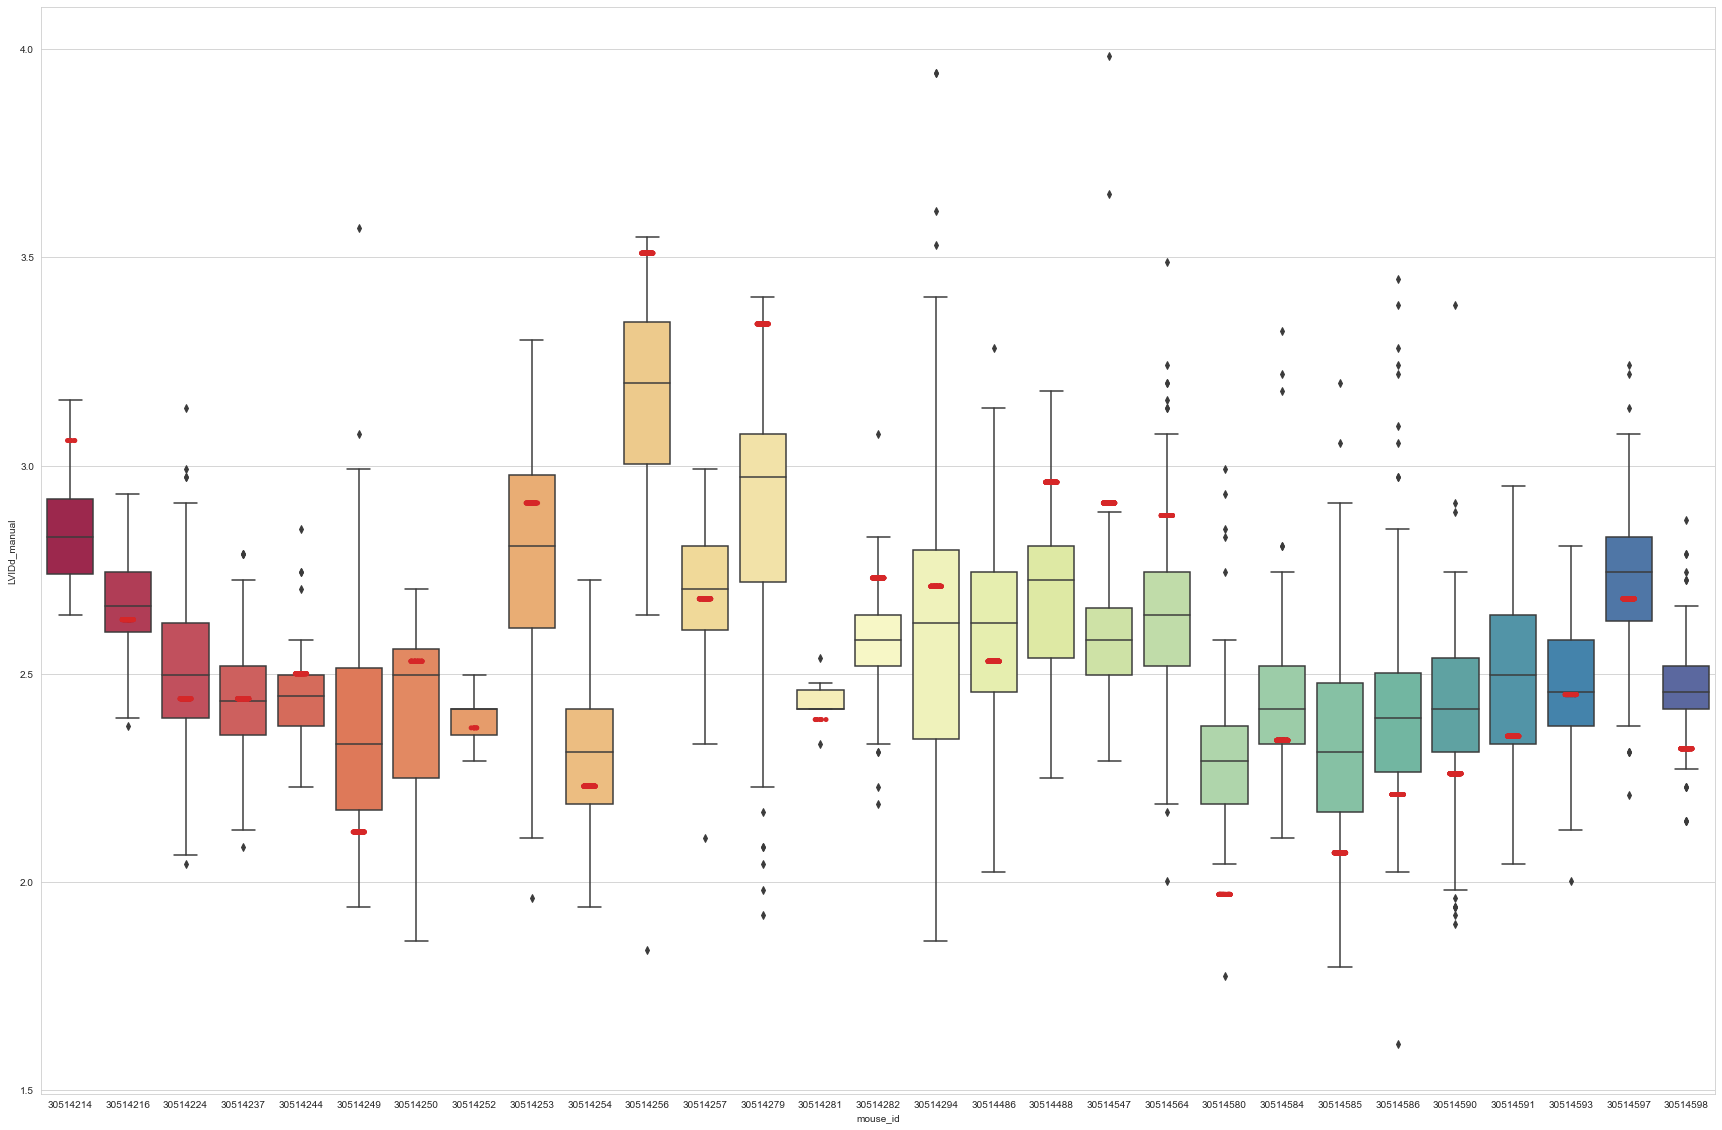

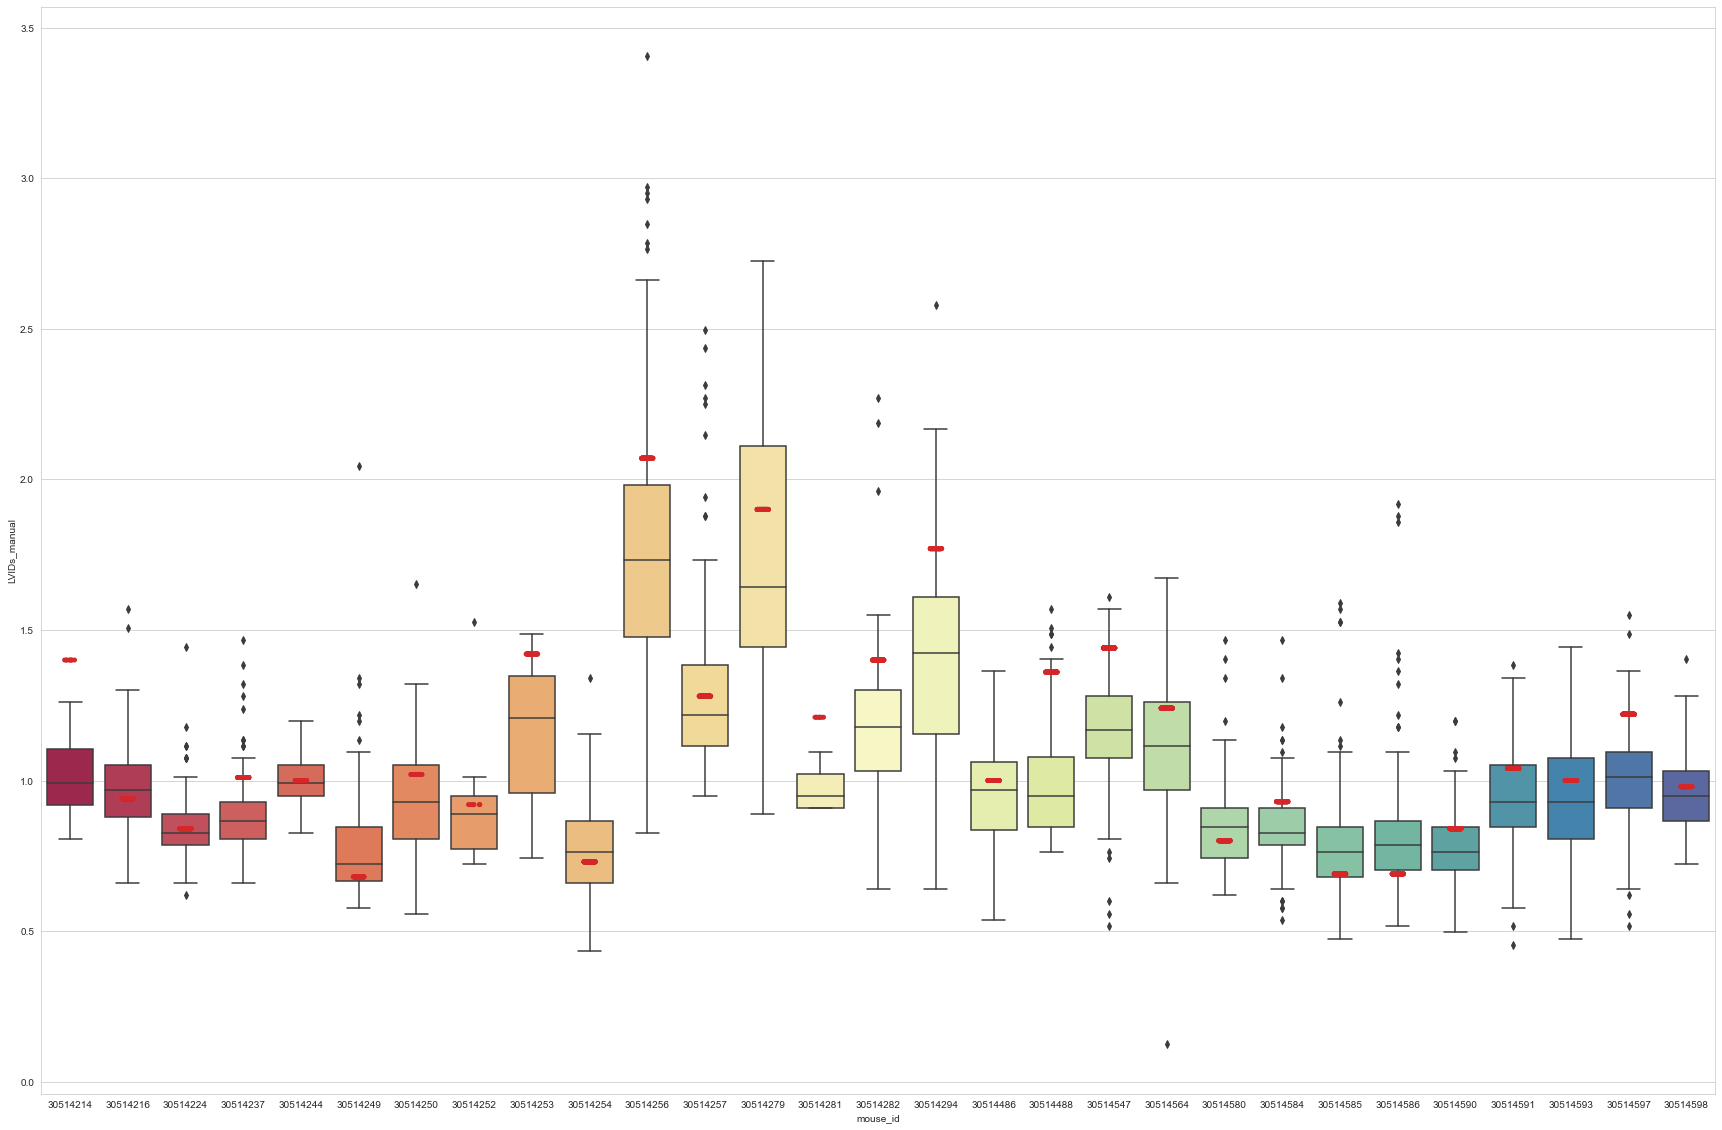

In [8]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_79930/1900006949.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize= (10,10))


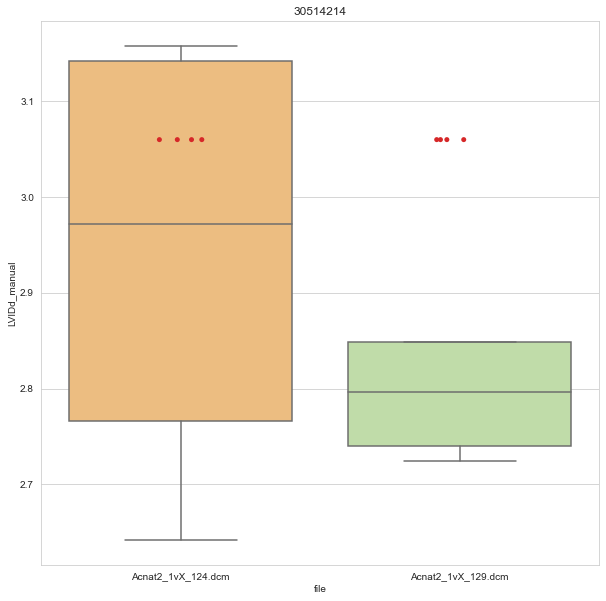

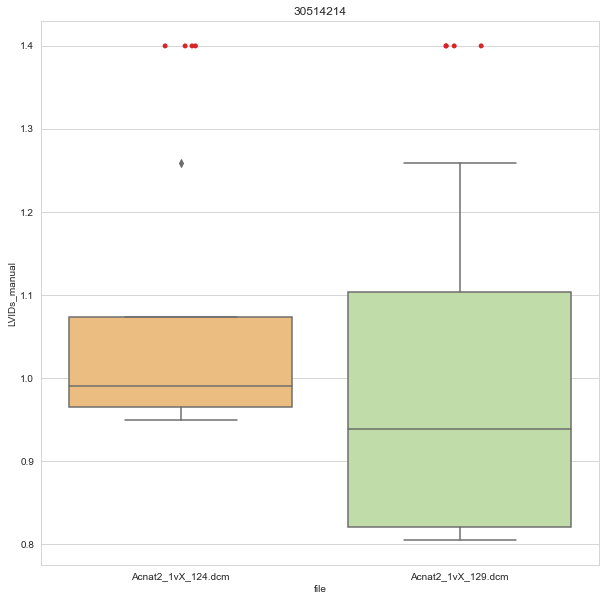

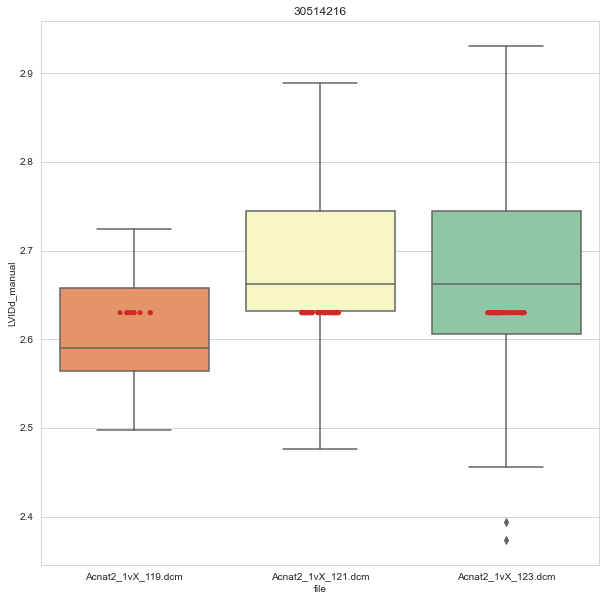

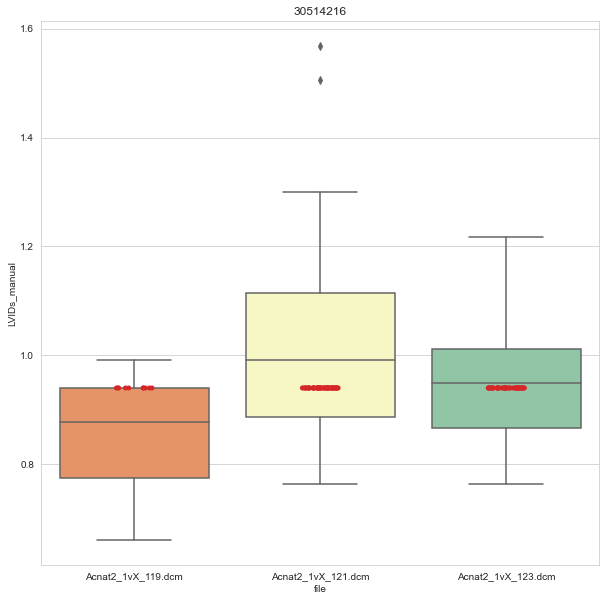

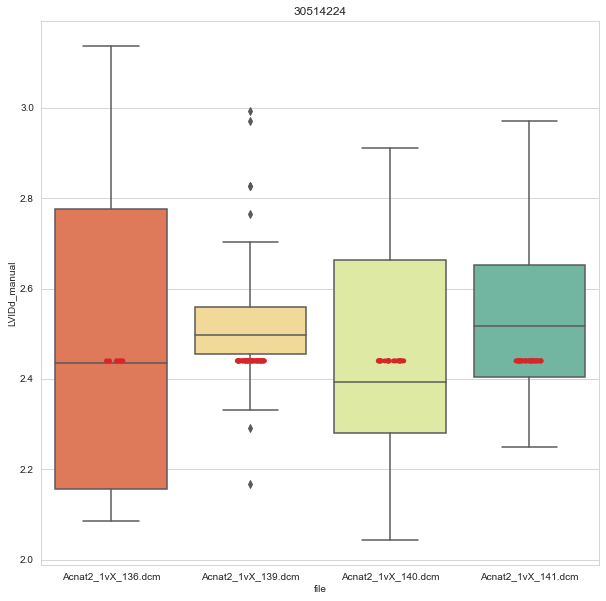

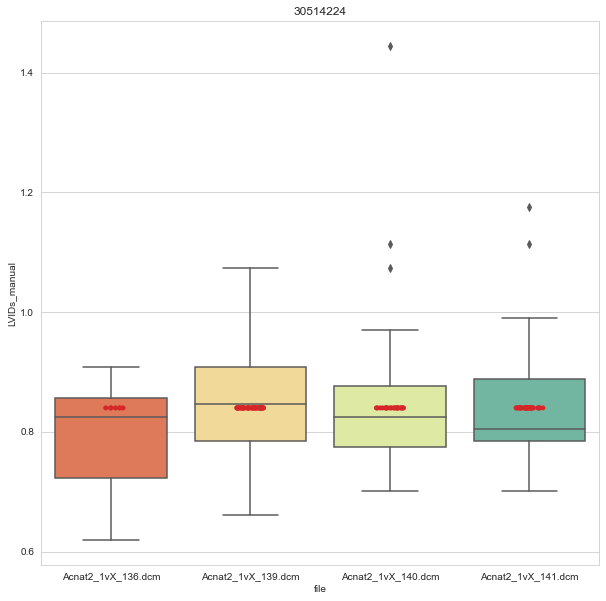

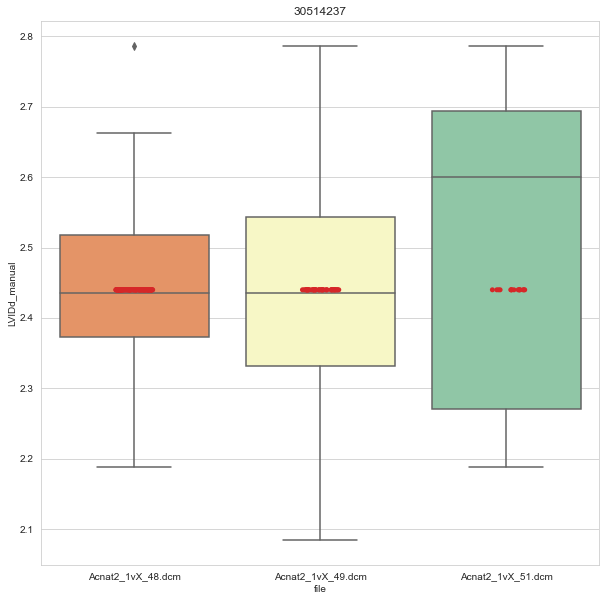

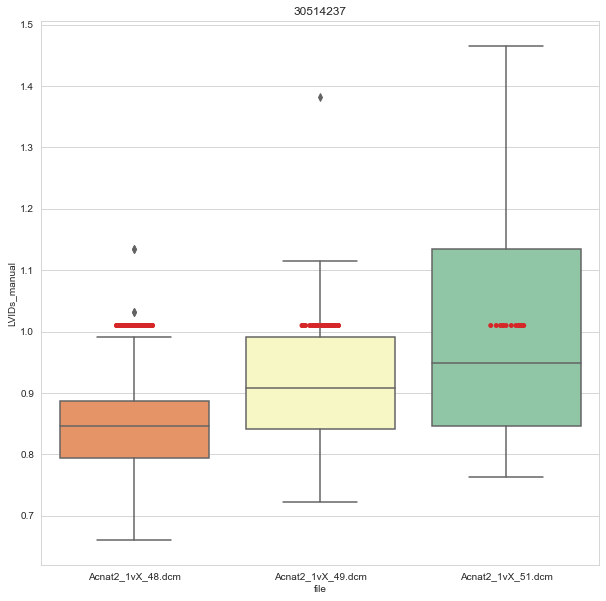

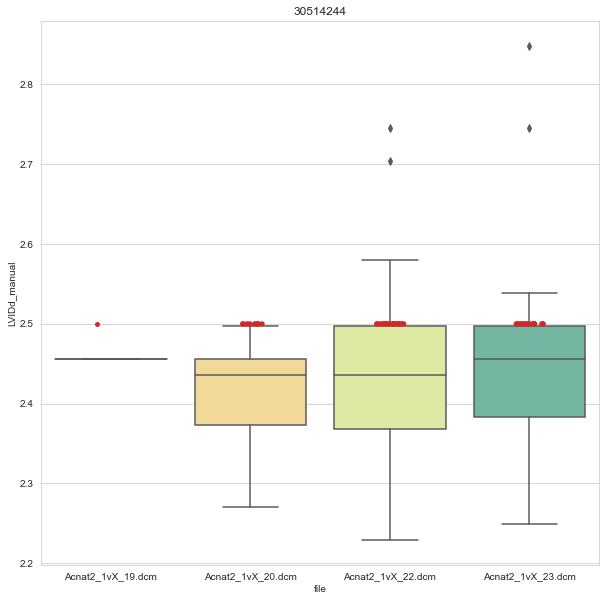

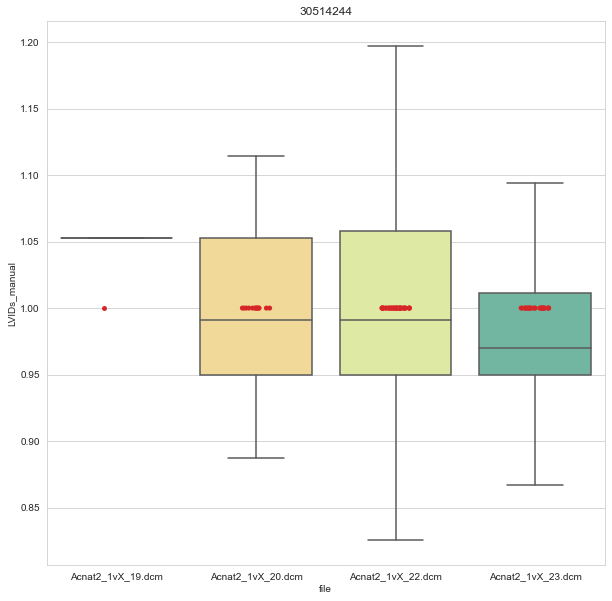

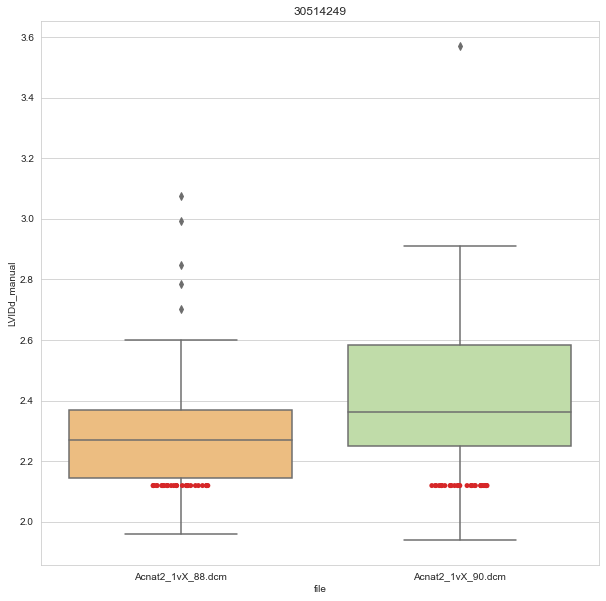

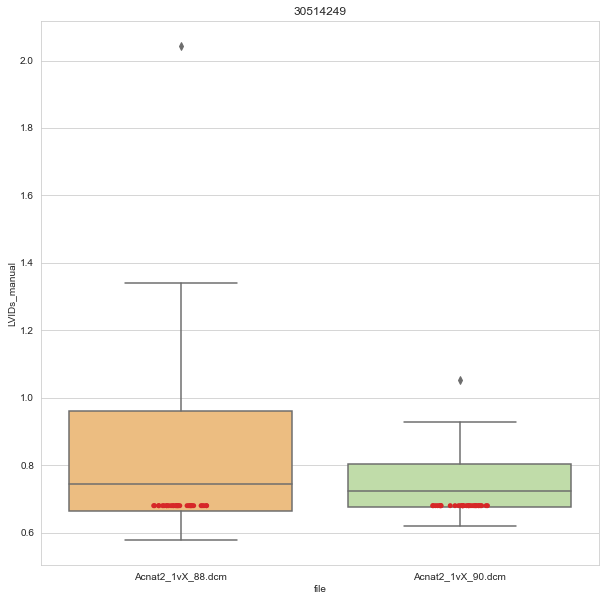

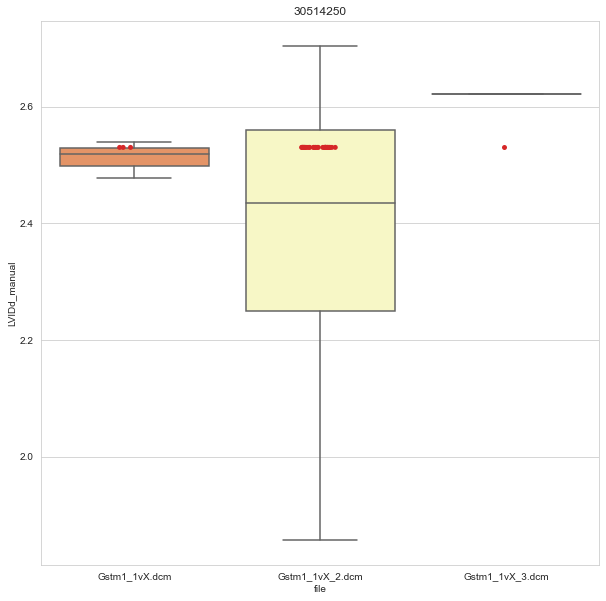

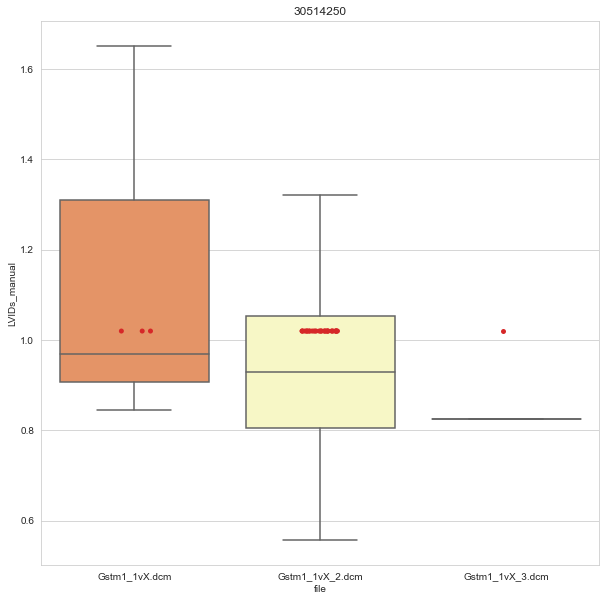

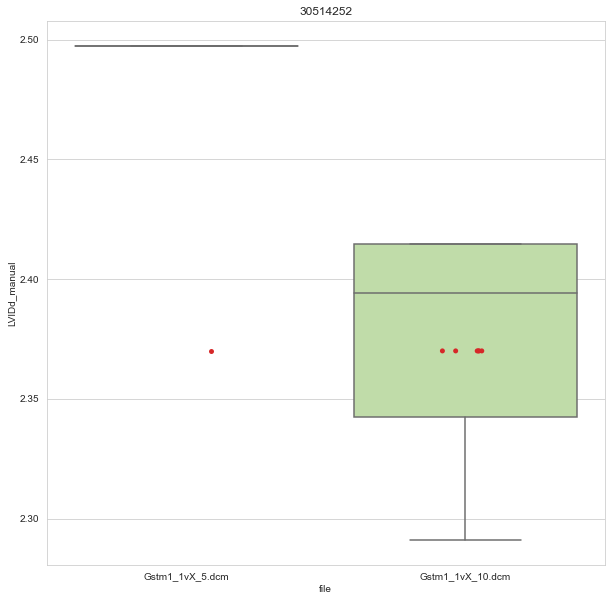

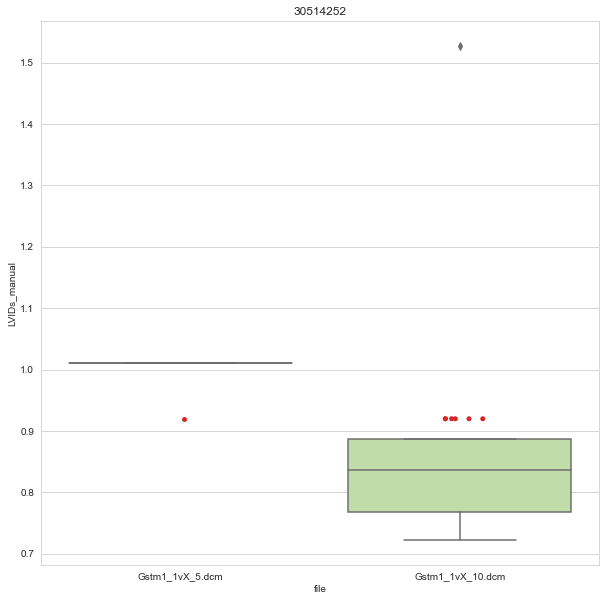

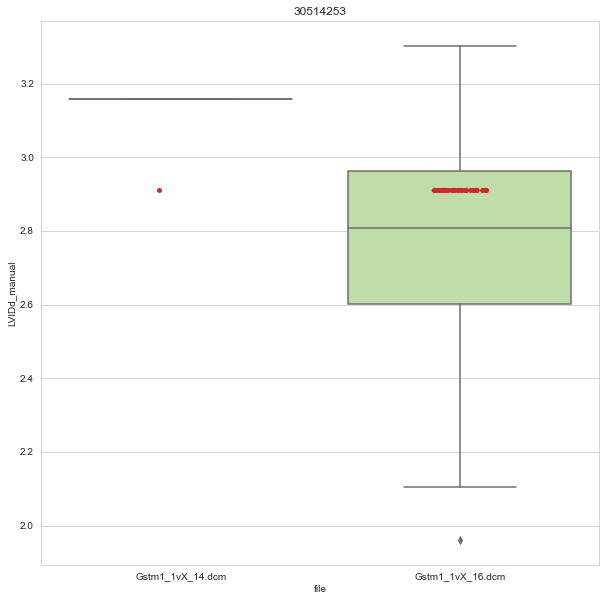

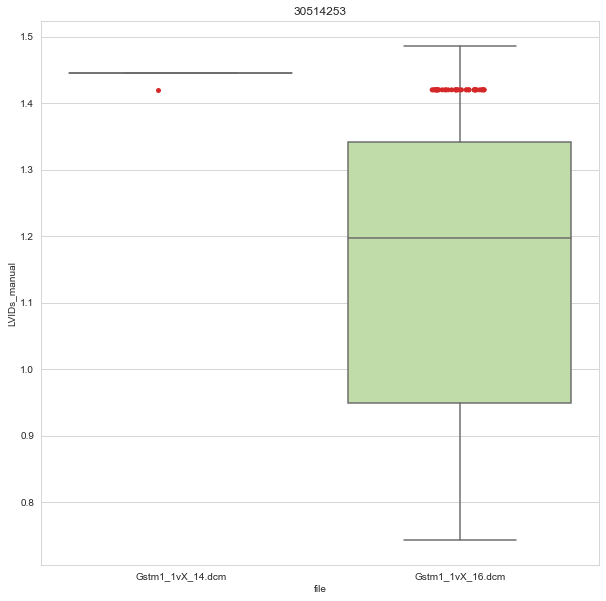

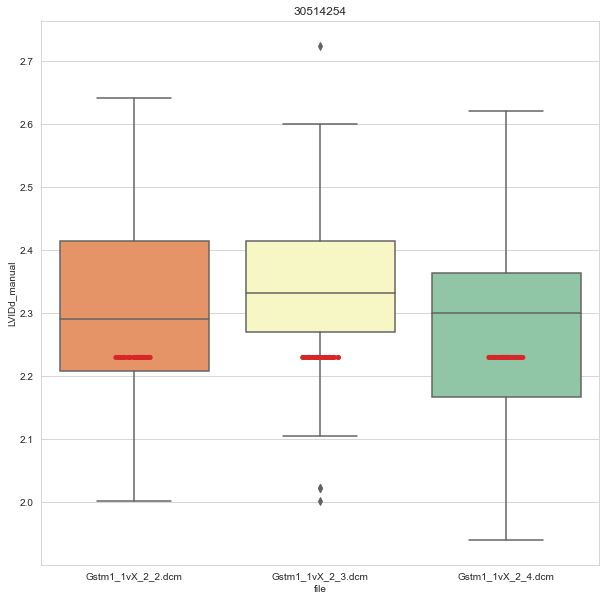

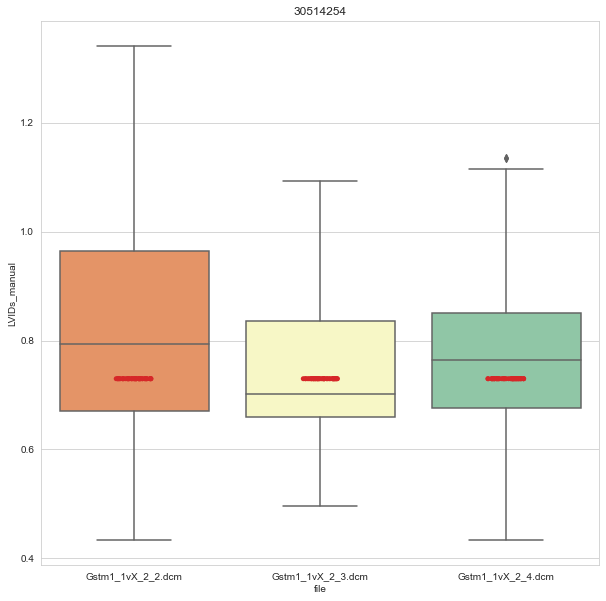

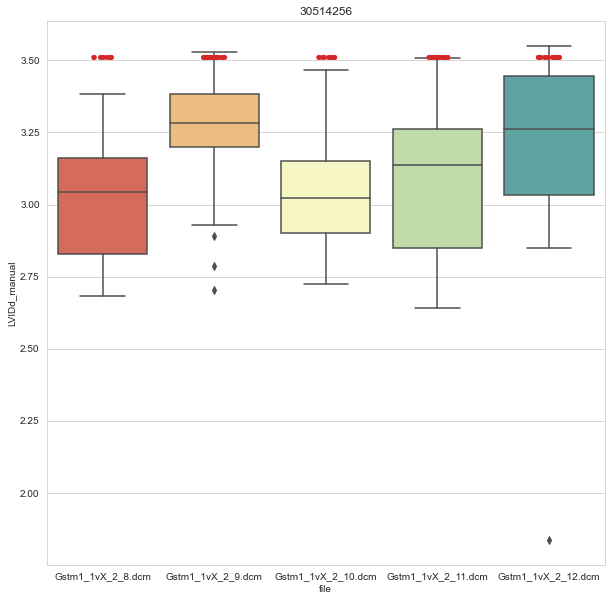

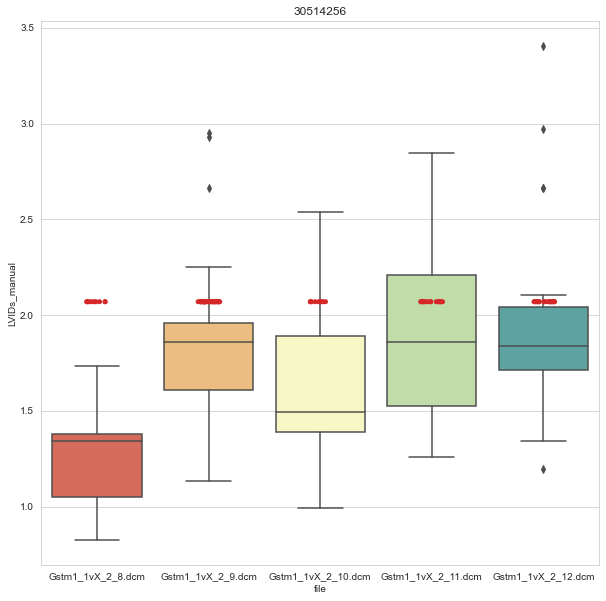

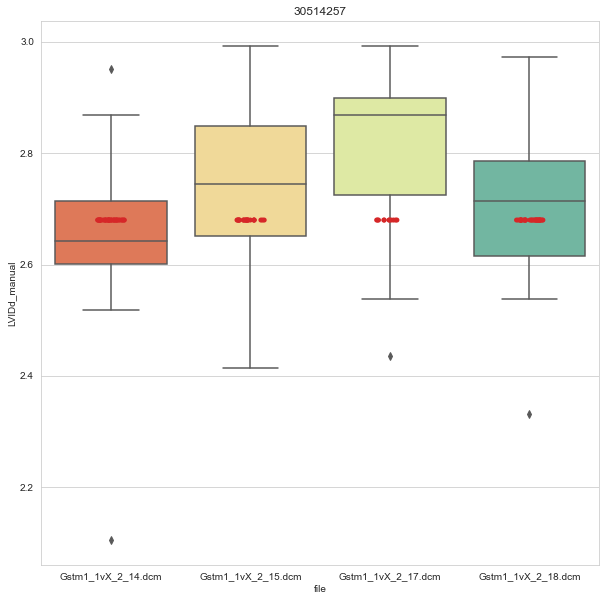

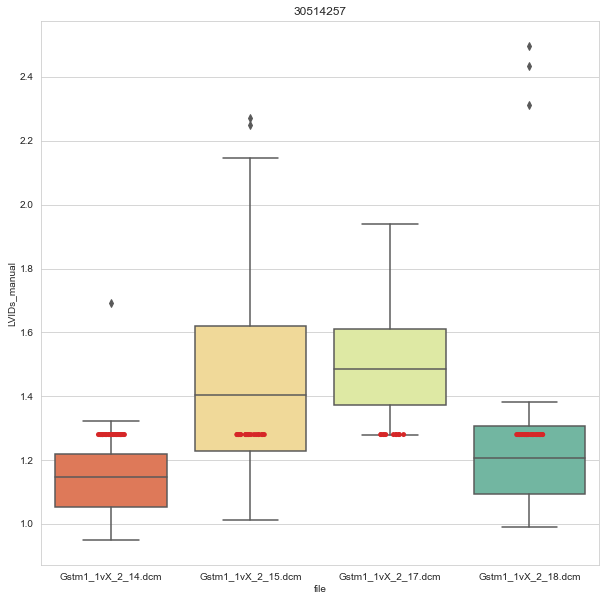

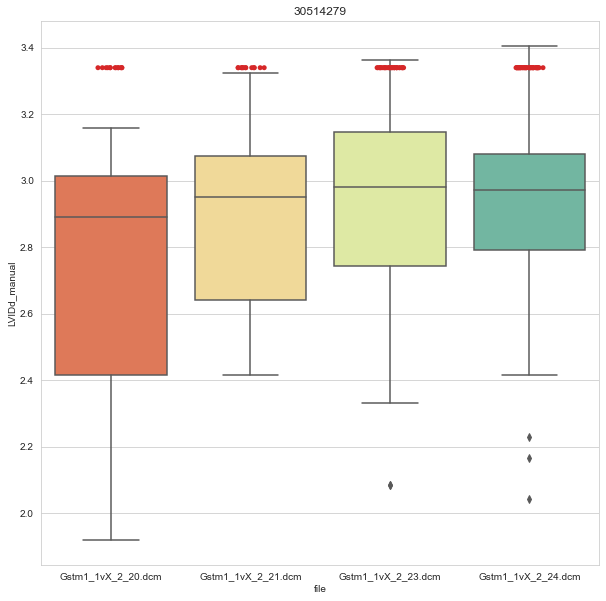

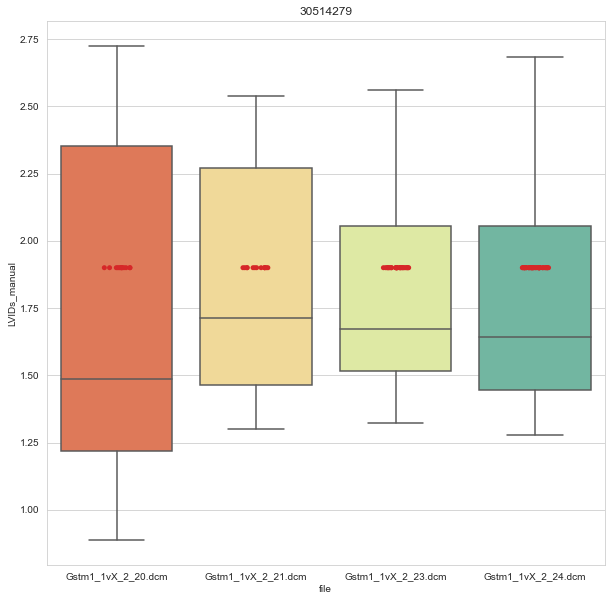

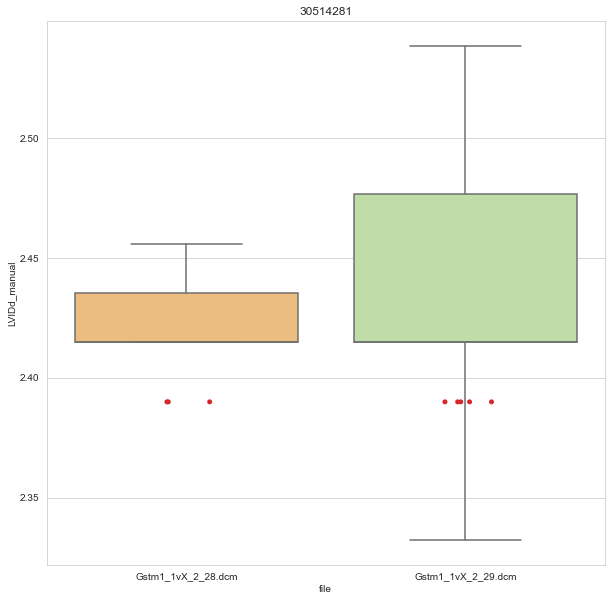

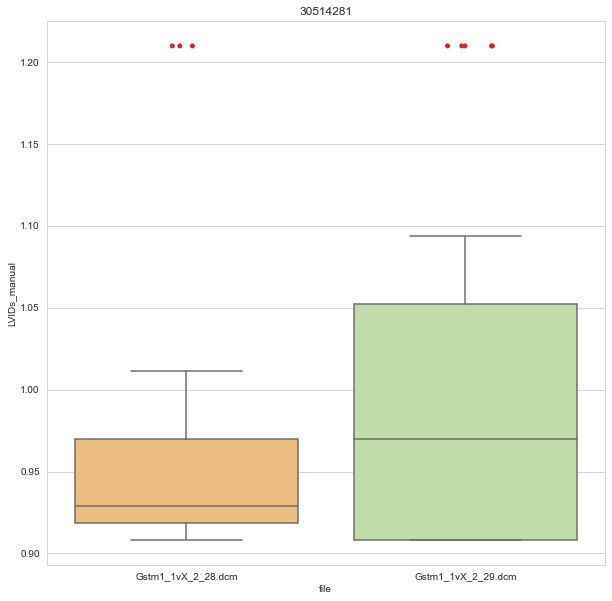

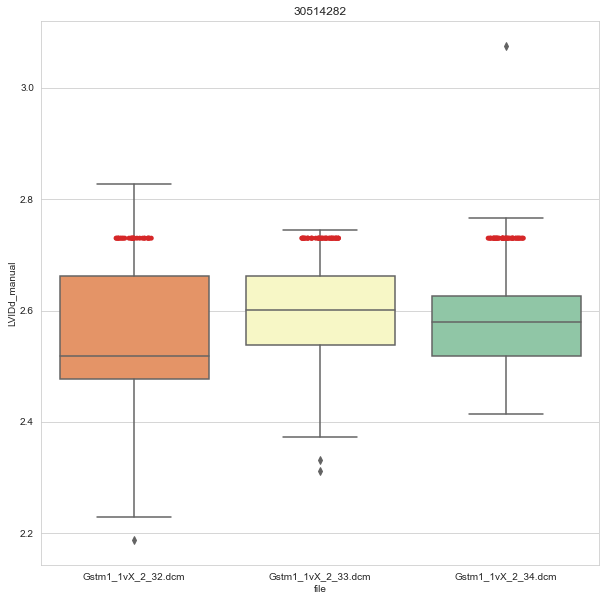

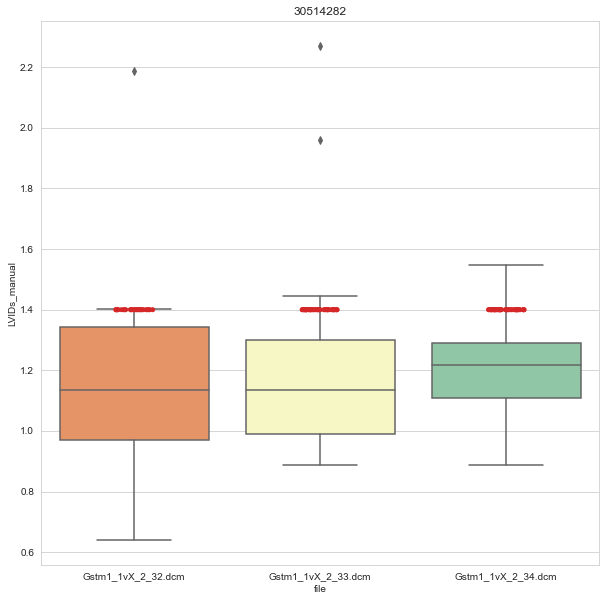

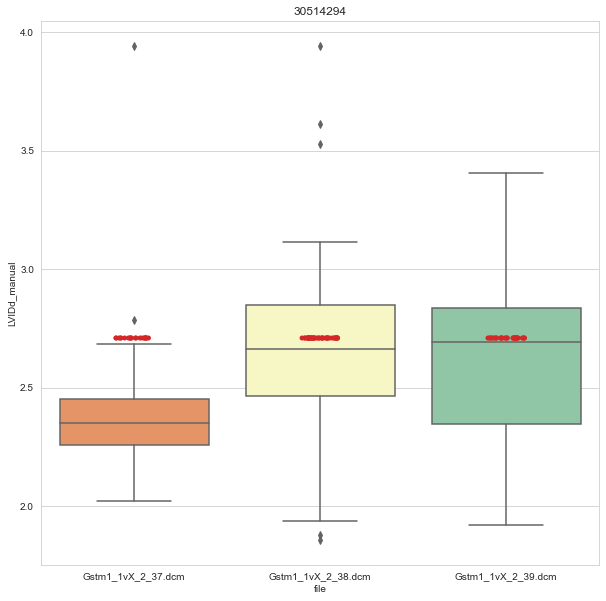

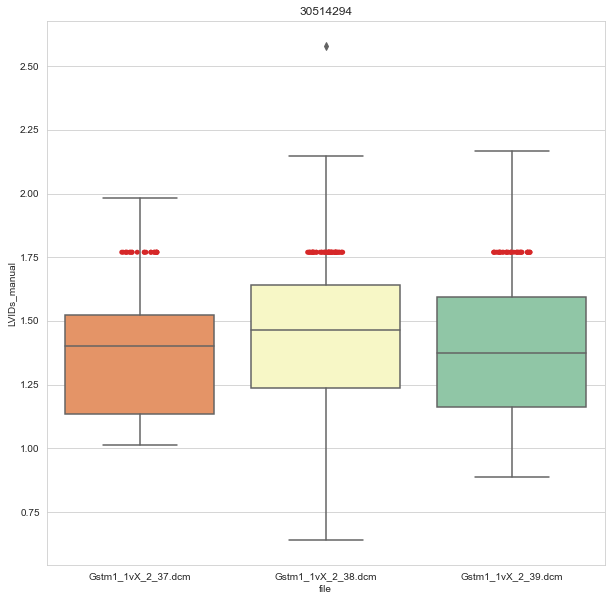

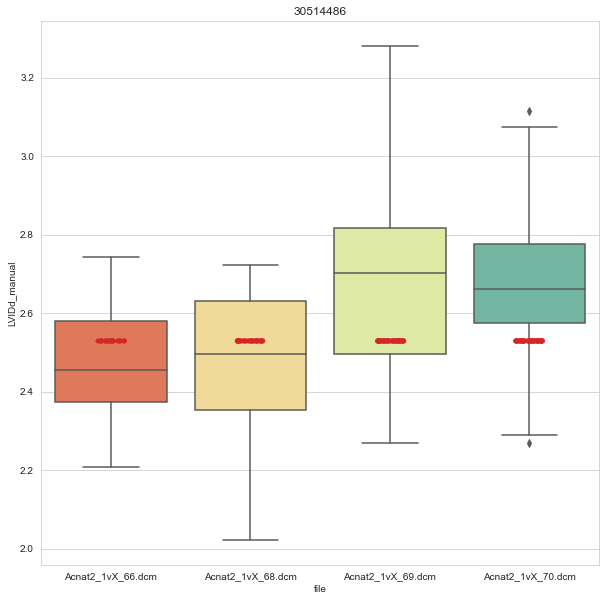

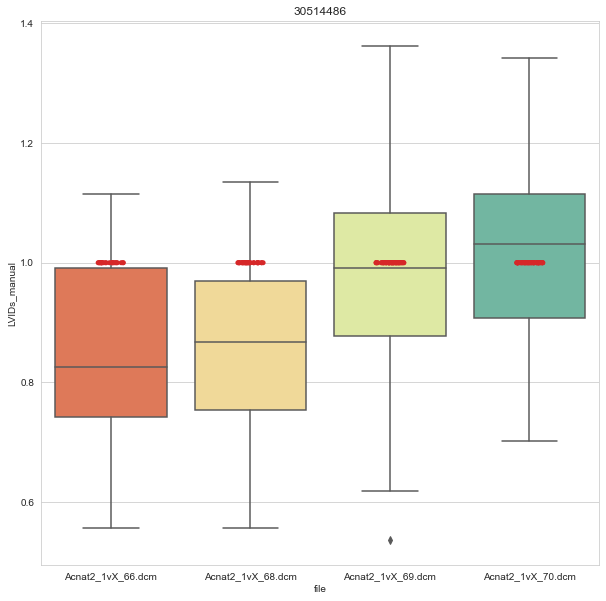

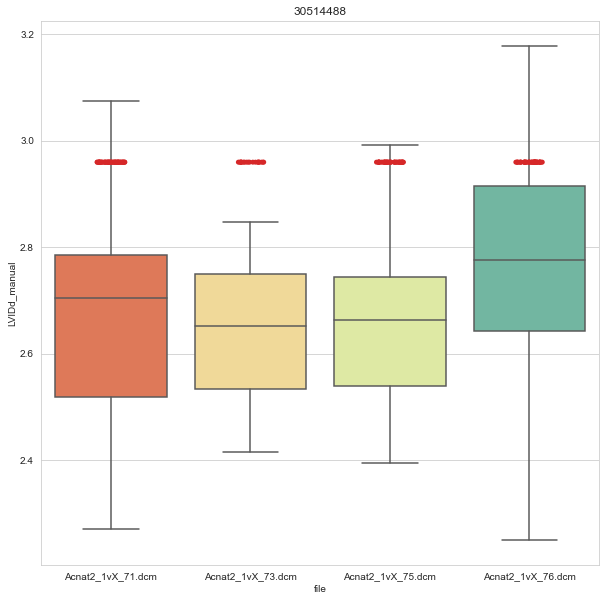

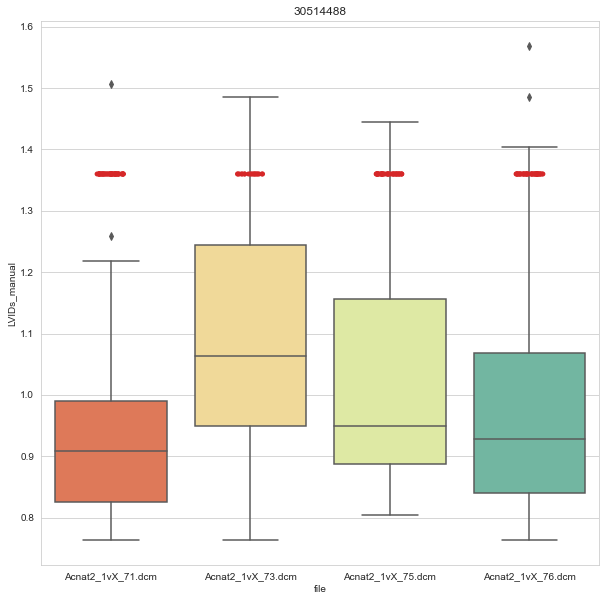

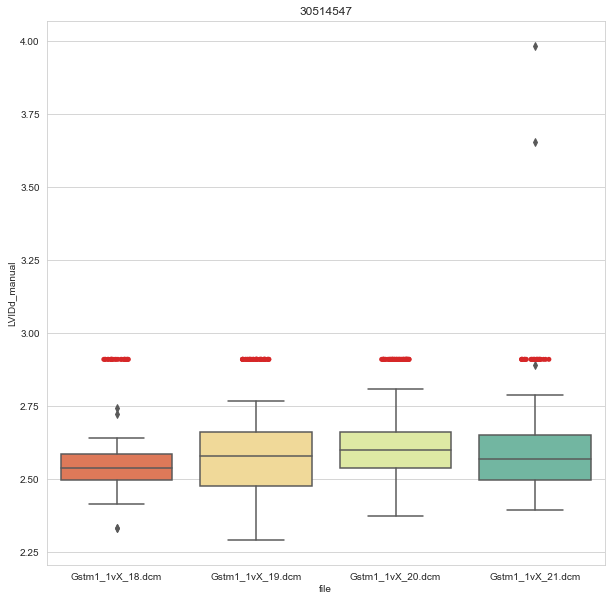

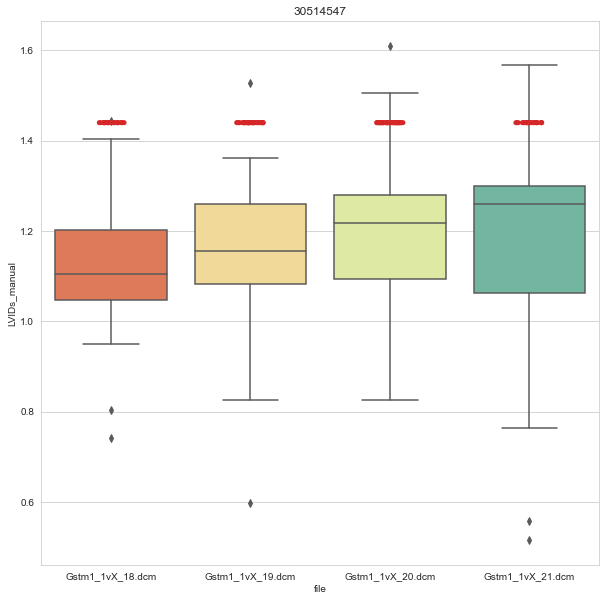

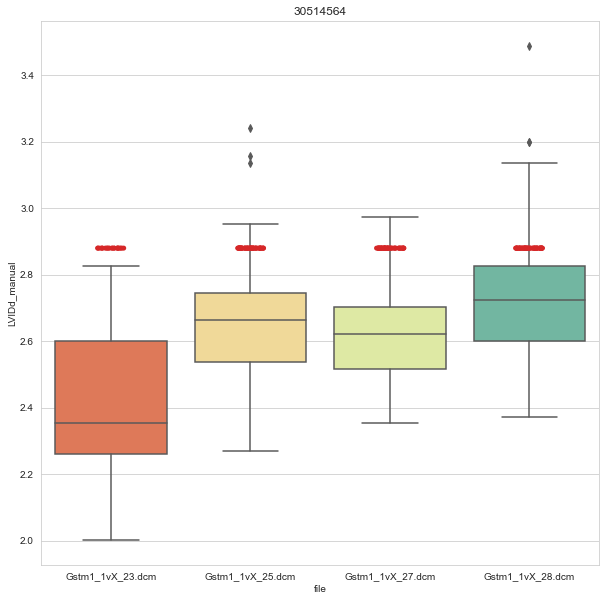

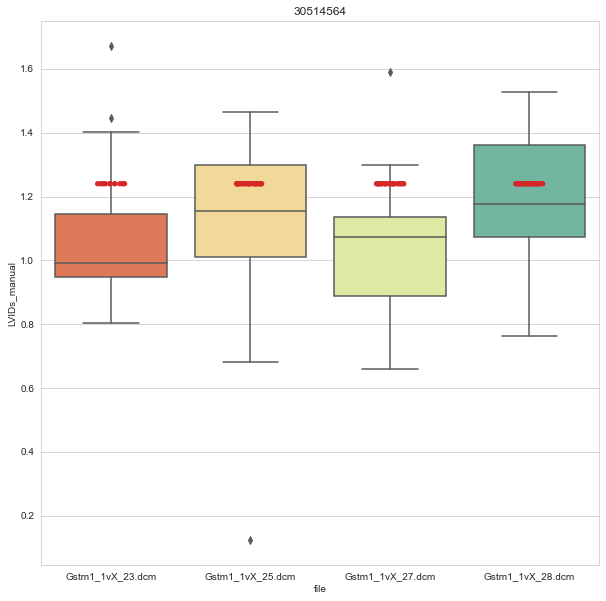

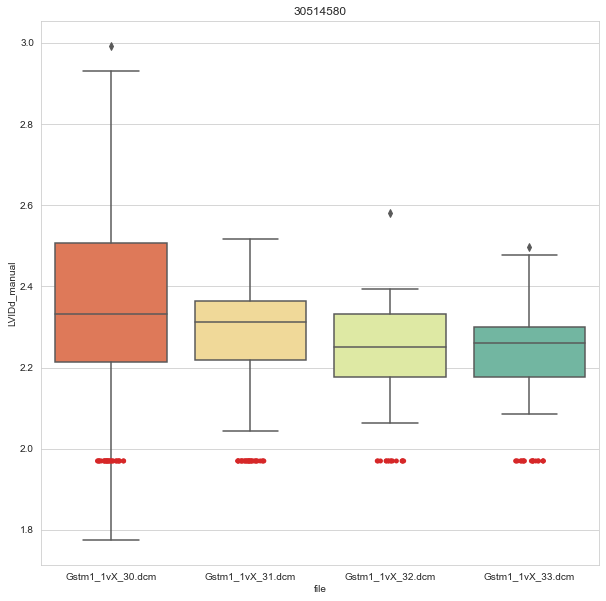

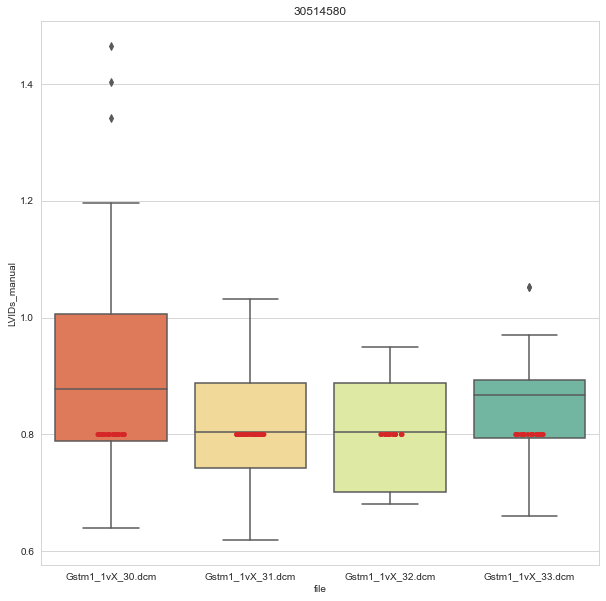

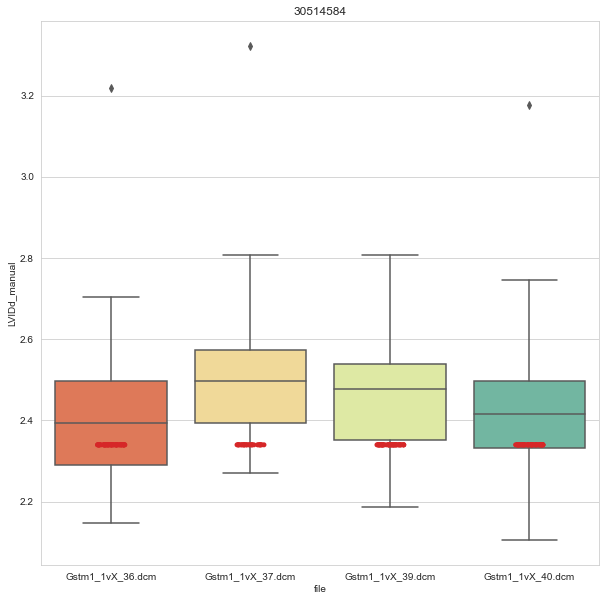

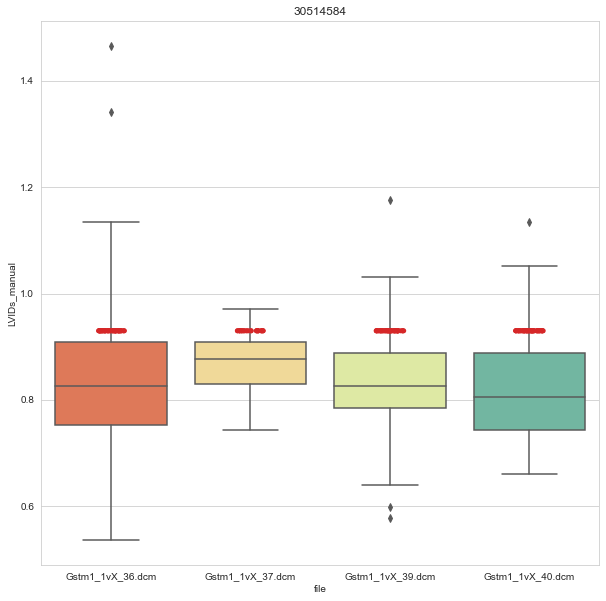

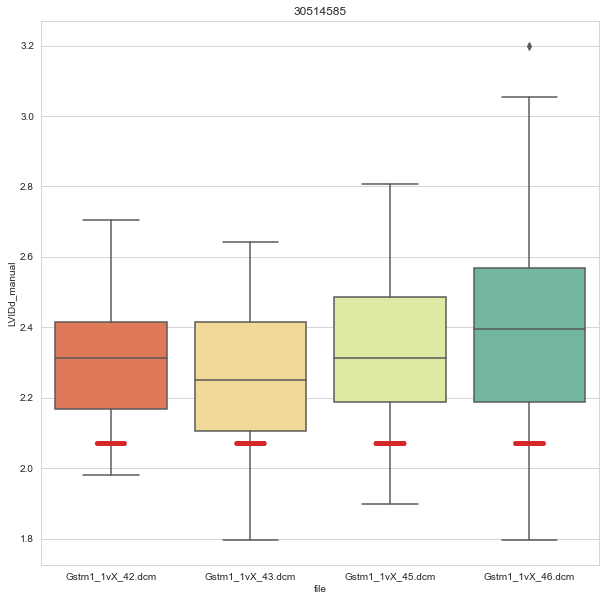

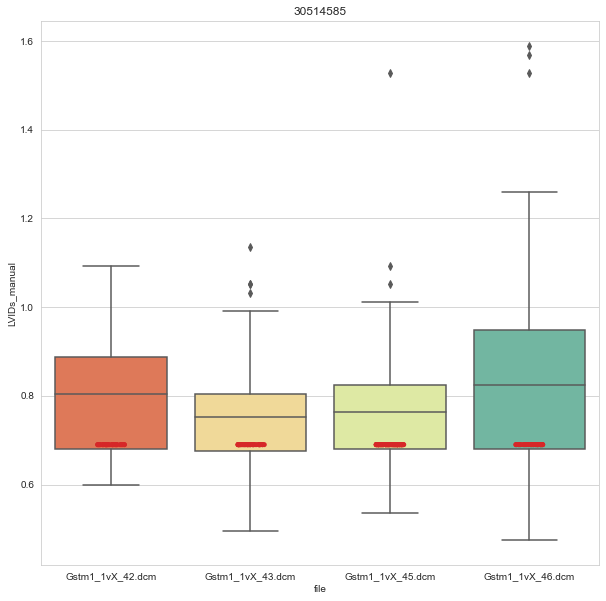

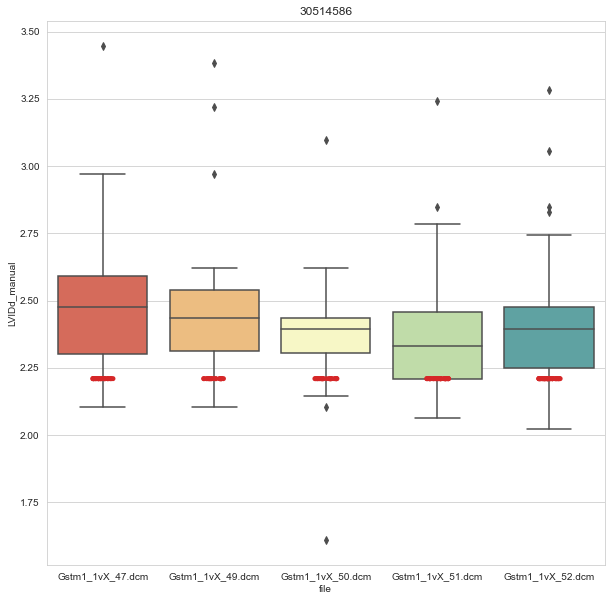

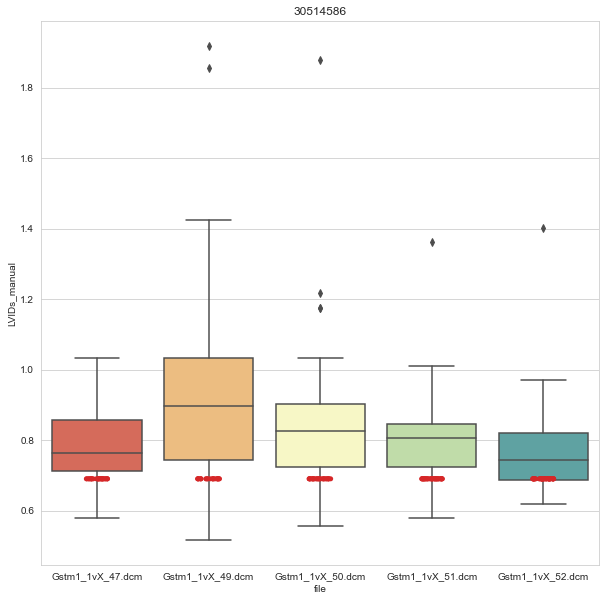

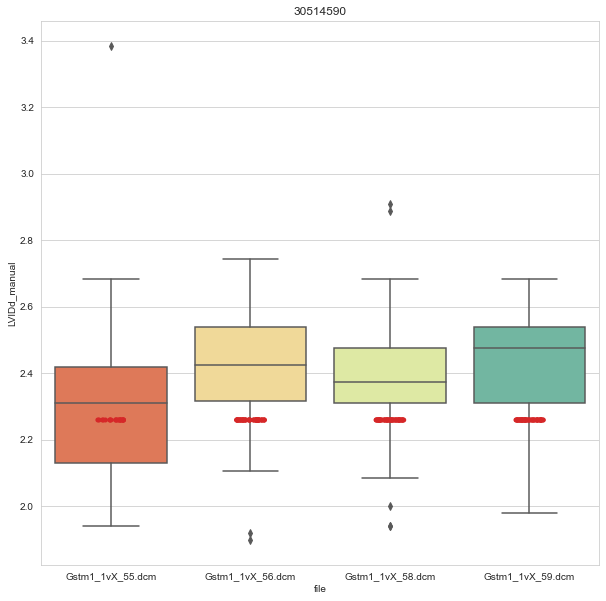

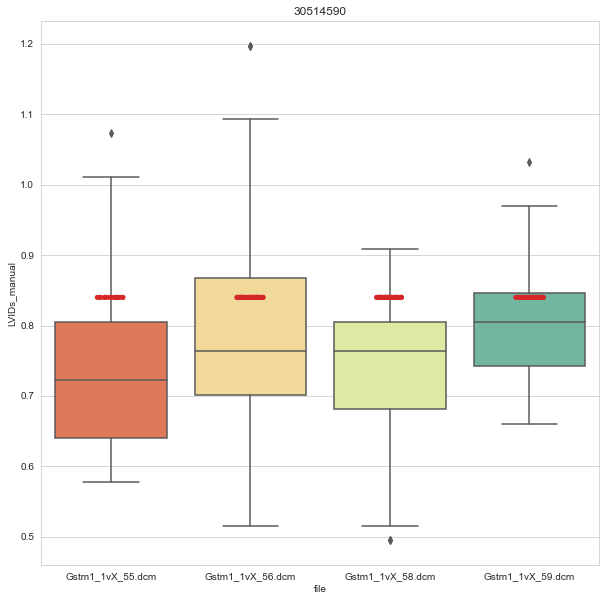

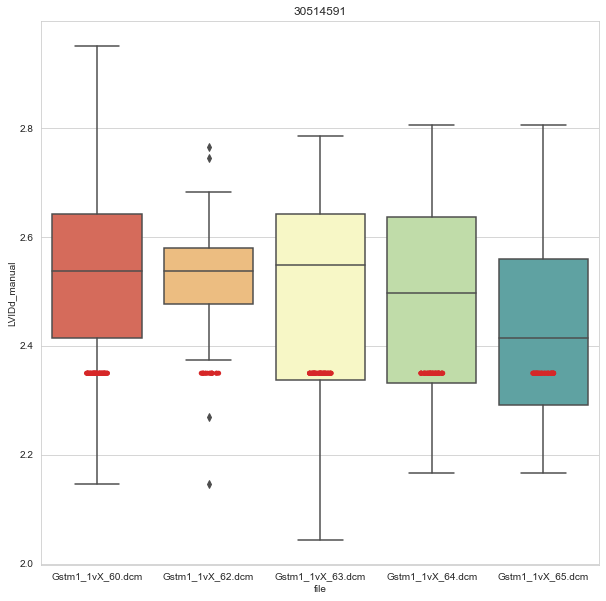

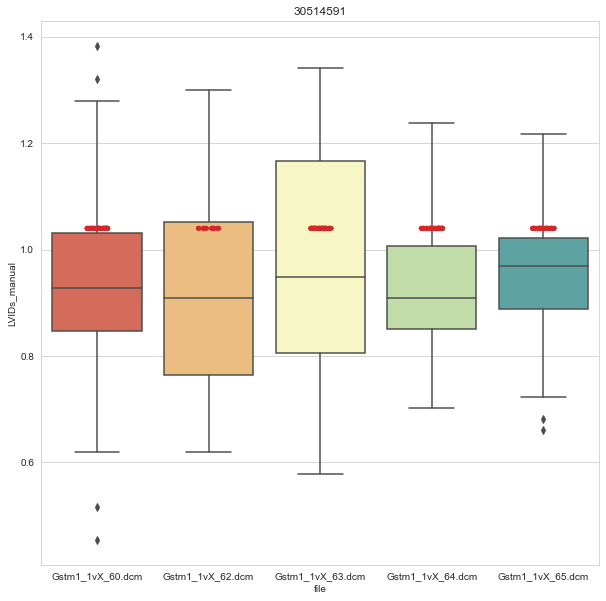

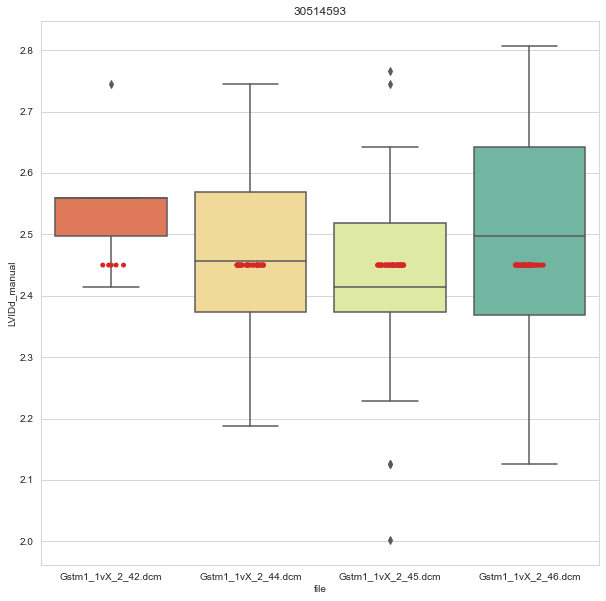

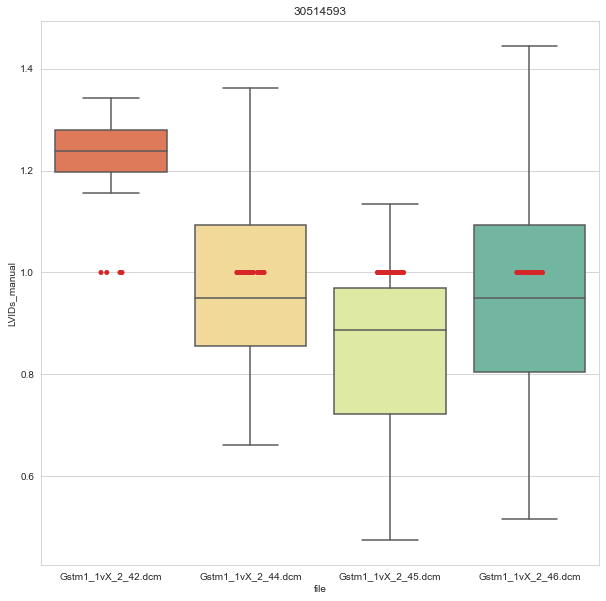

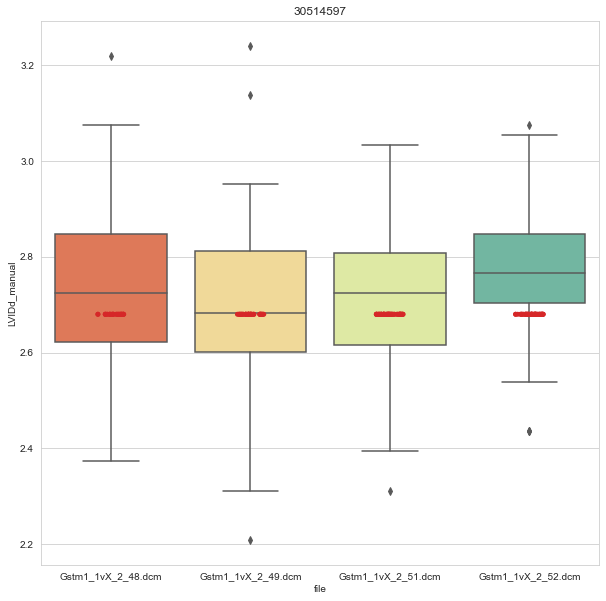

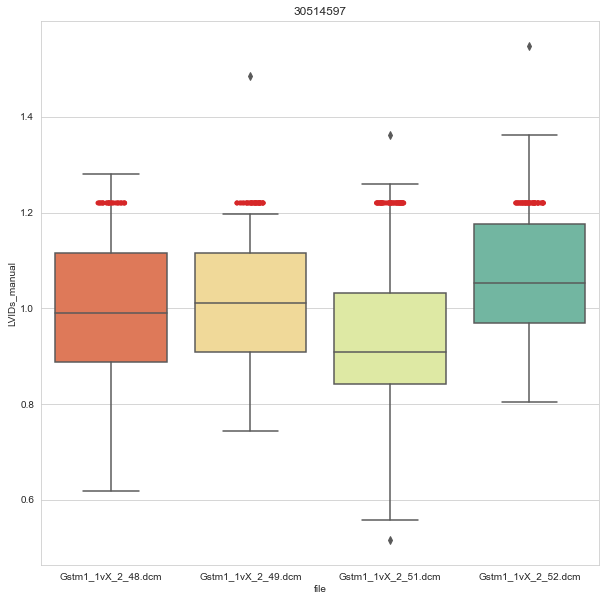

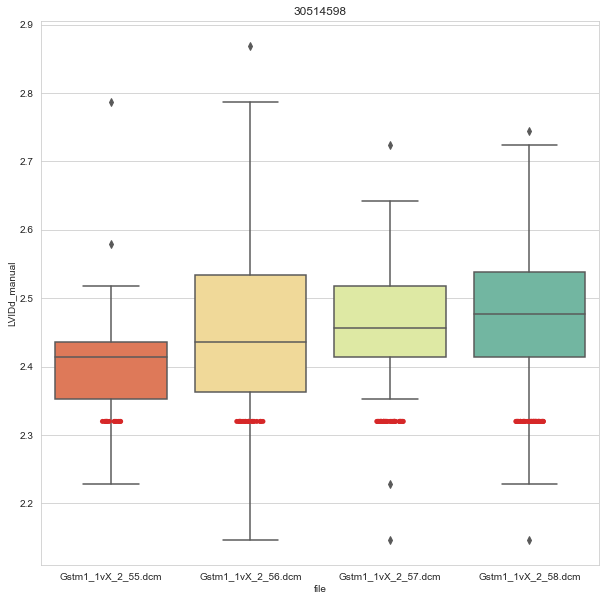

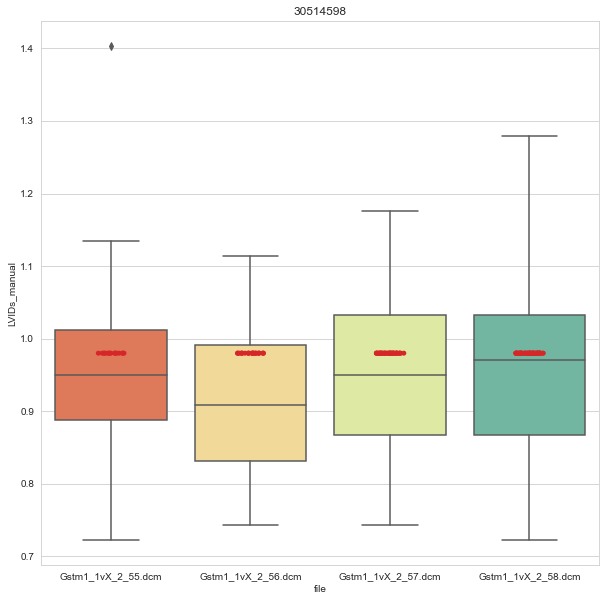

In [9]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [10]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
4,30514214,Acnat2_1vX_129,17.677287,82.322713
5,30514214,Acnat2_1vX_127,0.000000,100.000000
6,30514214,Acnat2_1vX_126,0.000000,100.000000
7,30514214,Acnat2_1vX_124,11.598424,88.401576
11,30514216,Acnat2_1vX_123,86.739764,13.260236
...,...,...,...,...
1411,30514597,Gstm1_1vX_2_48,54.120267,45.879733
1412,30514598,Gstm1_1vX_2_57,82.353949,17.646051
1413,30514598,Gstm1_1vX_2_58,100.000000,0.000000
1414,30514598,Gstm1_1vX_2_56,50.599520,49.400480


### Image quality per mouse

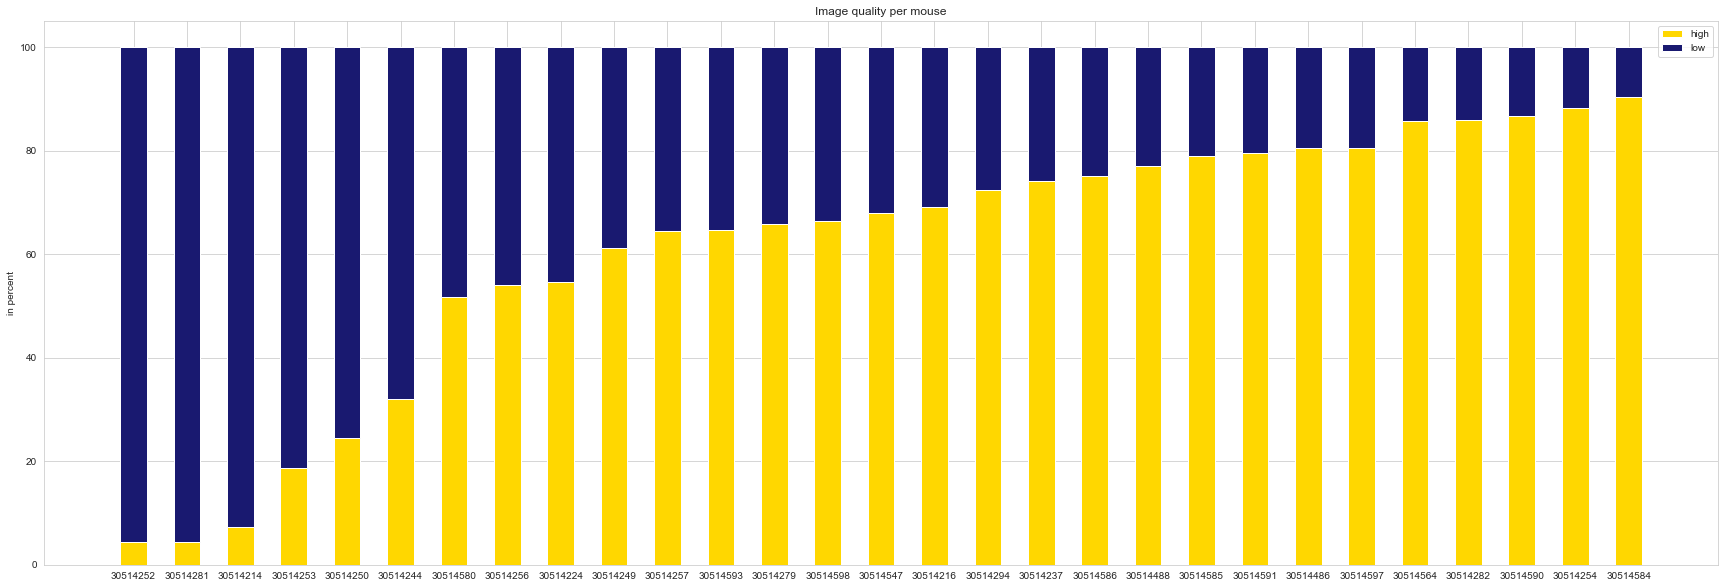

In [11]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [12]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Gstm1,60.46,39.54


## Calculation of stats

In [13]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [14]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [15]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [16]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [17]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,3576.00,3576.00,3576.00,3576.00
mean,0.01,-0.08,0.59,1.90
std,0.28,0.25,8.29,8.63
min,-1.67,-1.24,-88.32,-66.16
25%,-0.15,-0.21,-1.22,-2.16
50%,0.03,-0.08,1.43,2.51
75%,0.18,0.05,3.94,6.94
max,1.45,1.36,28.93,43.92
number of mice,29.00,29.00,29.00,29.00


## Calculating p-values with manually annotated data

In [18]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [19]:
# LVIDs systole
_, f_man_LVIDs = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDs_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDs = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDs_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDs = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDs_manual'], manual[manual['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)

# LVIDs diastole
_, f_man_LVIDd = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDd_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDd = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDd_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDd = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDd_manual'], manual[manual['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)

# Ejection fraction
_, f_man_ef = mannwhitneyu(f_man[f_man['genotype'] == 'control']['EF_manual'], f_man[f_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, m_man_ef = mannwhitneyu(m_man[m_man['genotype'] == 'control']['EF_manual'], m_man[m_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, man_ef = mannwhitneyu(manual[manual['genotype'] == 'control']['EF_manual'], manual[manual['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)

#Fractional shortening
_, f_man_fs= mannwhitneyu(f_man[f_man['genotype'] == 'control']['FS_manual'], f_man[f_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, m_man_fs= mannwhitneyu(m_man[m_man['genotype'] == 'control']['FS_manual'], m_man[m_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, man_fs= mannwhitneyu(manual[manual['genotype'] == 'control']['FS_manual'], manual[manual['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)

## Calculating p-values with automatically annotated data

### Creation of subgroups

In [20]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

### Wilcoxn-Rank-Sum-Test

In [21]:
# LVIDs systole
_, p_f_auto_LVIDs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDs_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDs_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDs_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)

In [22]:
# LVIDs diastole
_, p_f_auto_LVIDd = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDd_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDd = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDd_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDd = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDd_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)

In [23]:
# Ejection fraction
_, p_f_auto_ef = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['EF_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_ef = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['EF_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_ef = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['EF_auto'], means_auto[means_auto['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)

In [24]:
# Fractional shortening
_, p_f_auto_fs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['FS_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_fs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['FS_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_fs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['FS_auto'], means_auto[means_auto['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)

In [25]:
p_values = pd.DataFrame([[f_man_LVIDs, p_f_auto_LVIDs, m_man_LVIDs, p_m_auto_LVIDs ],
                         [f_man_LVIDd, p_f_auto_LVIDd, m_man_LVIDd, p_m_auto_LVIDd ],
                         [f_man_ef   , p_f_auto_ef   , m_man_ef   , p_m_auto_ef    ],
                         [f_man_fs   , p_f_auto_fs   , m_man_fs   , p_m_auto_fs    ]],
                        index = ['LVIDs', 'LVIDd', 'ejection fraction', 'fractional shortening'],
                        columns = ['f manual', 'f automatic', 'm manual', 'm automatic'])

In [26]:
p_values.round(3)

,f manual,f automatic,m manual,m automatic
LVIDs,0.948,1.000,1.000,0.867
LVIDd,0.796,0.662,0.908,0.694
ejection fraction,0.950,0.491,0.694,0.694
fractional shortening,0.950,0.573,0.613,0.613


In [27]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control']),
      len(f_man[f_man['genotype'] == 'mutant']),
      len(means_auto_f[means_auto_f['genotype'] == 'mutant'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control']),
      len(m_man[m_man['genotype'] == 'mutant']),
      len(means_auto_m[means_auto_m['genotype'] == 'mutant'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con', 'man mut', 'auto mut']
)
num_stats

,man con,auto con,man mut,auto mut
f,8,8,6,6
m,8,8,7,7


In [28]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')
p_values.to_csv(gene + '_p_values.csv')

In [29]:
def color_p_values(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'coral' if val < 0.05 else ''
    return 'background-color: %s' % color

In [30]:
analysis_overview = p_values.style.applymap(color_p_values).format("{:1.3f}")
analysis_overview

,f manual,f automatic,m manual,m automatic
LVIDs,0.948,1.000,1.000,0.867
LVIDd,0.796,0.662,0.908,0.694
ejection fraction,0.950,0.491,0.694,0.694
fractional shortening,0.950,0.573,0.613,0.613
